In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import polars as pl
import datetime as dt
import random

In [186]:
def play_game():
    # Start counting heads
    profit = 0
    counter = 1
    while random.random() > 0.5:
        counter += 1
    profit = 2 ** counter
    return profit
    # Keep flipping until you get tails
    # Return the payout (2^number_of_heads)
# Run game
print(play_game())

8


In [187]:
def run_simulation(num_games):
    games = []
    i = 0
    for i in range(num_games):
        profit = play_game()
        games.append(profit)
    return games

def analyse_results(games):
    print(f"Number of games played = {len(games)}")
    print(f"Max profit = {max(games)}")
    total_profit = 0
    for i in games:
        total_profit = total_profit + i
    average = total_profit / len(games)
    print(f"Average profit = {average}")

result = run_simulation(10)
print(result)
analyse_results(result)


[8, 2, 2, 2, 2, 16, 4, 8, 4, 2]
Number of games played = 10
Max profit = 16
Average profit = 5.0


In [188]:
class UtilityFunction:
    def __init__(self, utility_form, alpha = 1, beta = 0):
        self.type = utility_form
        self.alpha = alpha
        self.beta = beta

#positive affine transformation with alpha and beta
    def calculate_u(self, money):
        if self.type == "log":
            return self.alpha * np.log(money) + self.beta
        if self.type == "linear":
            return self.alpha * money + self.beta
        if self.type == "sqrt":
            return self.alpha * np.sqrt(money) + self.beta

#Method using one function
def u(money, utility_form, alpha = 1, beta = 0):
    return UtilityFunction(utility_form, alpha, beta).calculate_u(money)

#print(u(100, "sqrt", alpha = 2, beta = 1))


In [143]:

#Calculate EU by taking each element in function, apply u to it
# that makes a new list, then average the list
def calculate_EU(result, utility_form, alpha = 1, beta = 0):
    total = 0
    for profit in result:
        total = total + u(profit, utility_form, alpha, beta)
    EU = total / len(result)
    return EU

#Calculate certainty equivalence i.e. value of the game, need to clean this up
def inverse_u(expected_utility, utility_form="log", alpha=1, beta=0):
    if utility_form == "log":
        return np.exp((expected_utility - beta) / alpha)
    elif utility_form == "linear":
        return (expected_utility - beta) / alpha
    elif utility_form == "sqrt":
        return ((expected_utility - beta) / alpha) ** 2

#Running example simulation under parameters
result = run_simulation(1000000)
expected_utility = calculate_EU(result, "sqrt", alpha = 1, beta = 0)
print(f"EU = {expected_utility}")
print(f"Certainty equivalence = {inverse_u(expected_utility,"sqrt", 1, 0)}")


EU = 1.7047777703715372
Certainty equivalence = 2.9062672463529498


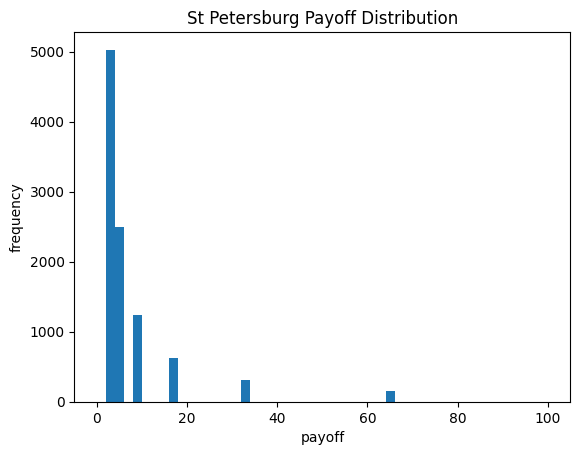

In [189]:
#plotting a histogram of payoffs. Need a range otherwise extreme values of x due to large simulation number distorts the histogram
# Need custom bin sizes because the default is 10 bins from min to max which could capture 1,2,4,8 in the first bin
def plot_payoff_dist(result):
    plt.hist(result, bins = 50, range = (0, 100))
    plt.xlabel("payoff")
    plt.ylabel("frequency")
    plt.title("St Petersburg Payoff Distribution")
result = run_simulation(10000)
plot_payoff_dist(result)

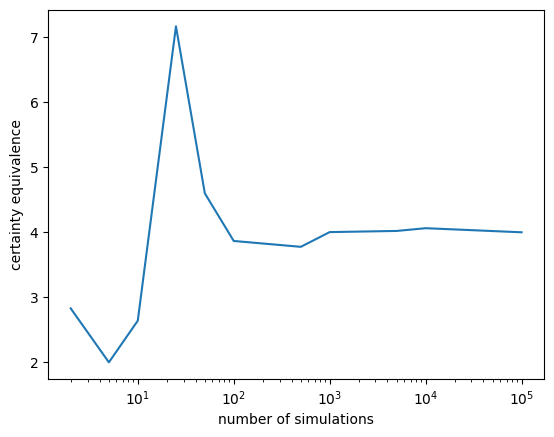

In [ ]:
#EU of a series (with equal p weighting) for log utility
def compute_EU(result):
    total = 0
    for profit in result:
        total = total + u(profit, "log")
    EU = total / len(result)
    return EU
# Plot of Certainty Equivalence as number of simulations increases
def plot_convergence():
    convergence_series = [2, 5, 10, 25, 50, 100, 500, 1000, 5000, 10000, 100000]
    payoff_series = []
    for n in convergence_series:
        payoff_n = run_simulation(n)
        payoff_series.append(payoff_n)
    
    utility_series = [compute_EU(x) for x in payoff_series]
    CE_series = [np.exp(y) for y in utility_series]

    plt.plot(convergence_series, CE_series)
    plt.xlabel("number of simulations")
    plt.xscale("log")
    plt.ylabel("certainty equivalence")
    plt.show()

plot_convergence()
    

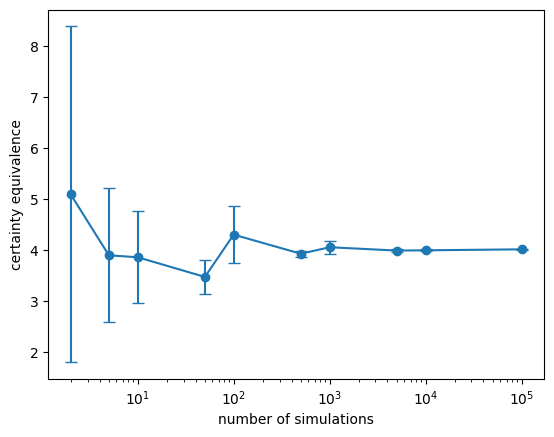

In [ ]:
#EU of a series (with equal p weighting) for log utility
def compute_EU(result):
    total = 0
    for profit in result:
        total = total + u(profit, "log")
    EU = total / len(result)
    return EU


#plot_convergence with error bars
def plot_convergence(reps = 5):
    convergence_series = [2, 5, 10, 50, 100, 500, 1000, 5000, 10000, 100000]
    
    # Lists of results for each rep
    CE_means = []
    CE_stds = []
    CE_std_errors = []

    # Run for each sample size
    for n in convergence_series:
        CE_values = []
        for rep in range(reps):
            payoff_n = run_simulation(n)
            utility_n = compute_EU(payoff_n)
            CE_n = np.exp(utility_n)
            CE_values.append(CE_n)

        # Calculate mean, standard deviation and standard error
        CE_means.append(np.mean(CE_values))
        CE_stds.append(np.std(CE_values))
        CE_std_errors.append(np.std(CE_values)/np.sqrt(reps))
    
    # Plot with error bars
    plt.errorbar(convergence_series, CE_means, yerr=CE_std_errors, 
                 marker='o', linestyle='-', capsize=4)
    plt.xlabel("number of simulations")
    plt.xscale("log")
    plt.ylabel("certainty equivalence")
    plt.show()

plot_convergence()